In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the data
data = pd.read_csv("market_fact.csv")
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [4]:
# No of rows in the data
data.shape[0]

8399

In [5]:
# Statistical descriptions
data.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [6]:
# description for categorical
data.describe(include=object)

,Ord_id,Prod_id,Ship_id,Cust_id
count,8399,8399,8399,8399
unique,5506,17,7701,1832
top,Ord_542,Prod_6,SHP_1378,Cust_1140
freq,6,1225,4,30


In [7]:
# missing values
data.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin    63
dtype: int64

#### Imputation
- Filling the missing values
- Numerical columns
- with a number
- with mean or median or mode
- using ML model make the missing value as output
- categorical column
- with a new category
- ex:'Unknown','?'
- with mode (most frequent category)
Here 63 missing values are there in the numerical column Product_Base_Margin

In [8]:
data['Product_Base_Margin'] = \
                data['Product_Base_Margin'].fillna(data['Product_Base_Margin'].mean())
data['Product_Base_Margin'].isnull().sum()

0

## Exploratory Data Analysis(EDA)

(array([8.047e+03, 2.580e+02, 7.800e+01, 1.300e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.2400000e+00, 8.9081210e+03, 1.7814002e+04, 2.6719883e+04,
        3.5625764e+04, 4.4531645e+04, 5.3437526e+04, 6.2343407e+04,
        7.1249288e+04, 8.0155169e+04, 8.9061050e+04]),
 <a list of 10 Patch objects>)

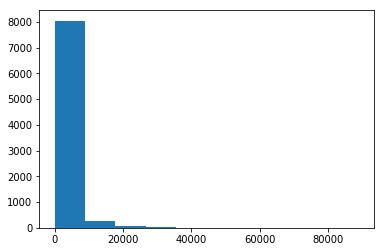

In [9]:
plt.hist(data['Sales'])

- In the first bin(2.24 to 8908) we have 8047 entries in the data
- Total no of entries 8399

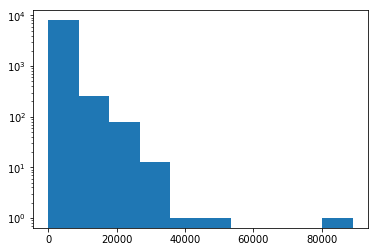

In [10]:
plt.hist(data['Sales'])
plt.yscale('log')

(array([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-14140.7  , -10004.561,  -5868.422,  -1732.283,   2403.856,
          6539.995,  10676.134,  14812.273,  18948.412,  23084.551,
         27220.69 ]),
 <a list of 10 Patch objects>)

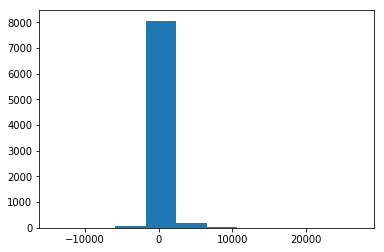

In [11]:
plt.hist(data['Profit'])

In [12]:
np.log([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([1.94591015, 2.19722458, 4.29045944, 8.99541298, 5.23644196,
       3.8286414 , 2.19722458,       -inf,       -inf, 0.        ])

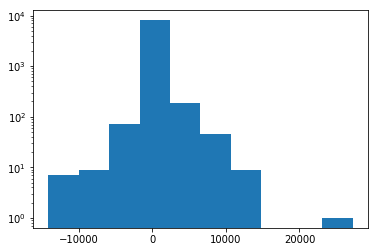

In [13]:
plt.hist(data['Profit'])
plt.yscale("log")

(array([868., 847., 789., 816., 854., 827., 848., 825., 876., 849.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

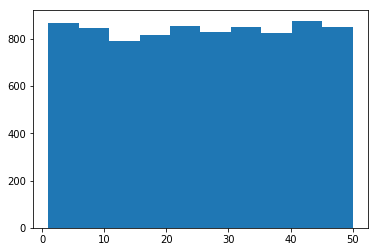

In [14]:
plt.hist(data['Order_Quantity'])

<BarContainer object of 17 artists>

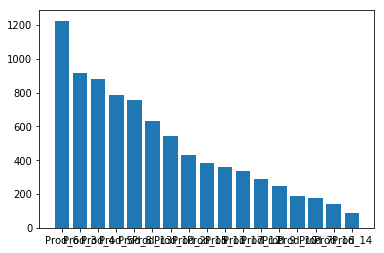

In [15]:
plt.bar(data['Prod_id'].value_counts().index,data['Prod_id'].value_counts())

<BarContainer object of 17 artists>

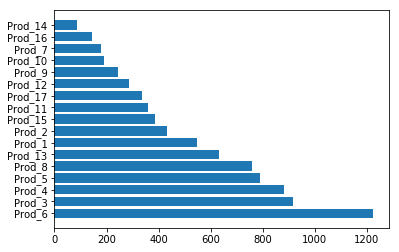

In [16]:
plt.barh(data['Prod_id'].value_counts().index,data['Prod_id'].value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad26bb9b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad26bb9f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad26bb9748>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad26bc2898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad26bc2be0>],
 'means': []}

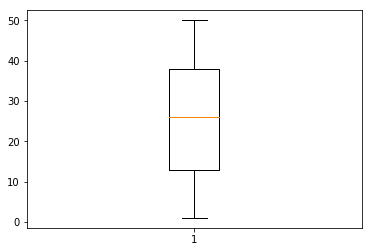

In [17]:
plt.boxplot(data['Order_Quantity'])

In [18]:
data['Order_Quantity'].describe()

count    8399.000000
mean       25.571735
std        14.481071
min         1.000000
25%        13.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Order_Quantity, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad26c12a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad26c12eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad26c126a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad26c1f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad26c1fb38>],
 'means': []}

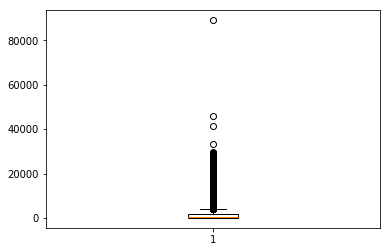

In [19]:
plt.boxplot(data['Sales'])

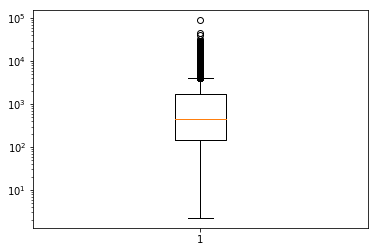

In [20]:
plt.boxplot(data['Sales'])
plt.yscale("log")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad268f7438>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad268f7390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad268f7240>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad268f15f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad268f1ac8>],
 'means': []}

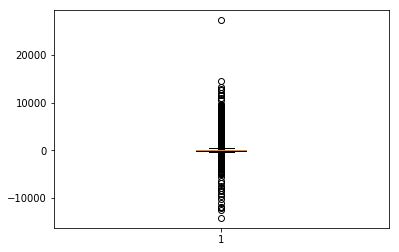

In [21]:
plt.boxplot(data['Profit'])

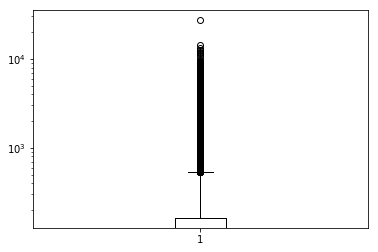

In [22]:
plt.boxplot(data['Profit'])
plt.yscale("log")

In [23]:
data[data['Profit']<0]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.560000
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.370000
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.370000
13,Ord_2207,Prod_11,SHP_3093,Cust_839,3364.2480,0.10,15,-693.23,61.76,0.780000
14,Ord_2207,Prod_10,SHP_3006,Cust_839,1410.9300,0.08,10,-317.48,36.09,0.770000
15,Ord_2280,Prod_5,SHP_3114,Cust_839,460.6900,0.06,48,-103.48,7.29,0.450000
18,Ord_4427,Prod_6,SHP_6171,Cust_1521,283.1300,0.08,45,-141.26,6.81,0.360000
19,Ord_996,Prod_13,SHP_1378,Cust_371,41.9700,0.05,12,-37.03,4.20,0.560000
20,Ord_996,Prod_13,SHP_1378,Cust_371,57.1700,0.08,18,-24.03,2.31,0.560000
21,Ord_996,Prod_6,SHP_1378,Cust_371,81.2500,0.01,11,-44.54,7.86,0.370000


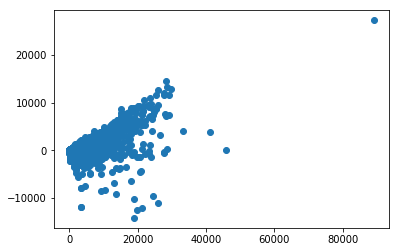

In [24]:
plt.scatter(data['Sales'],data['Profit'])

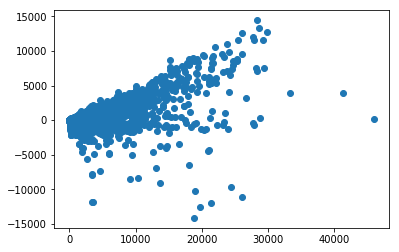

In [25]:
data1 = data[(data['Sales'] <50000) & (data['Profit']<20000)]
plt.scatter(data1['Sales'],data1['Profit'])

(-20000, 20000)

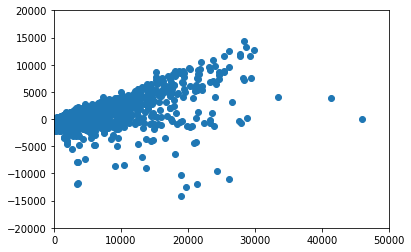

In [26]:
plt.scatter(data['Sales'],data['Profit'])
plt.xlim(0,50000)
plt.ylim(-20000,20000)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


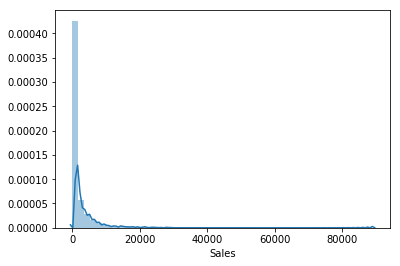

In [27]:
sns.distplot(data['Sales'])

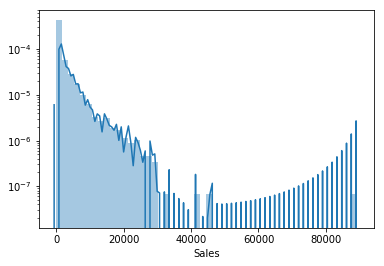

In [28]:
sns.distplot(data['Sales'])
plt.yscale('log')

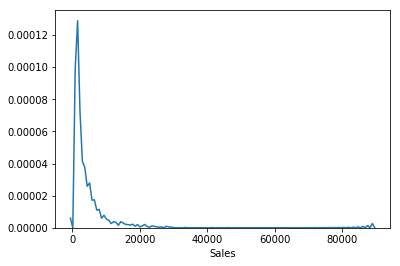

In [29]:
sns.distplot(data['Sales'],hist=False)

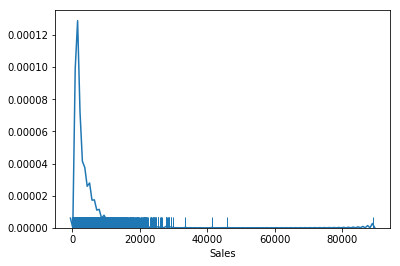

In [30]:
sns.distplot(data['Sales'],hist=False,rug=True)

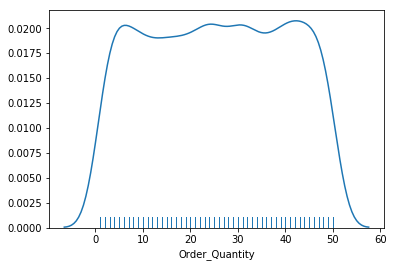

In [31]:
sns.distplot(data['Order_Quantity'],hist=False,rug=True)

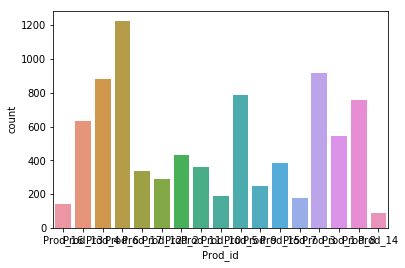

In [32]:
sns.countplot(data['Prod_id'])

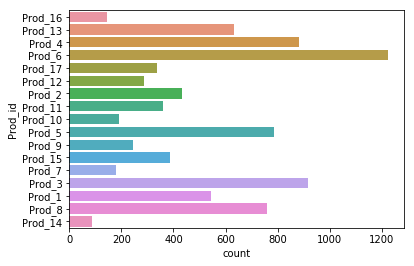

In [33]:
sns.countplot(y=data['Prod_id'])

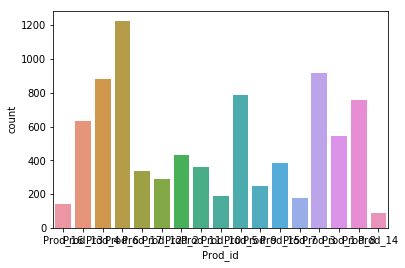

In [34]:
sns.countplot("Prod_id",data=data)

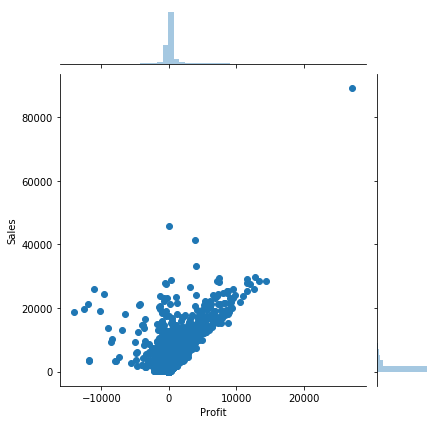

In [35]:
sns.jointplot("Profit","Sales",data=data)

In [36]:
data.columns[data.dtypes !=object]

Index(['Sales', 'Discount', 'Order_Quantity', 'Profit', 'Shipping_Cost',
       'Product_Base_Margin'],
      dtype='object')

Salse,Discount
Salse, Orderer_Quantityu

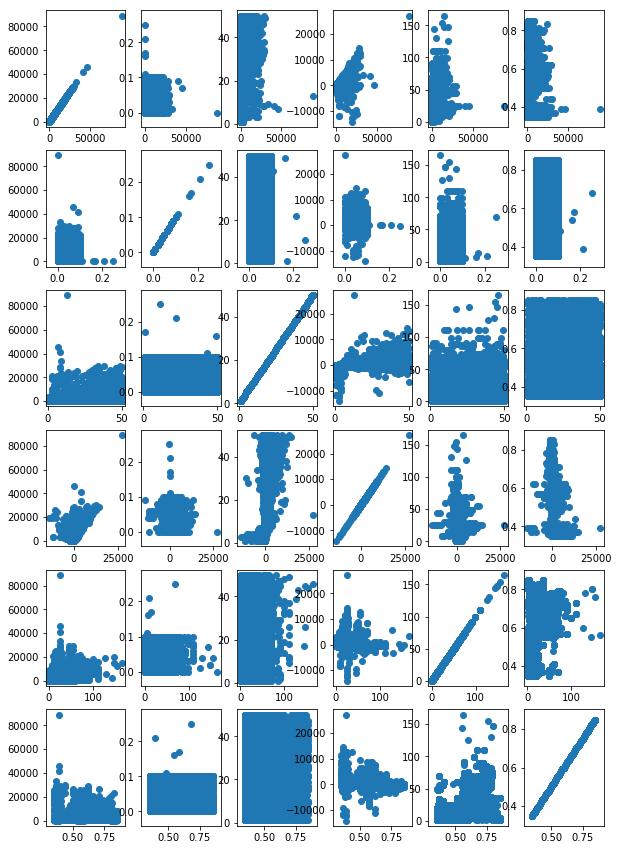

In [38]:
i = 0
plt.figure(figsize=(10,15))
for col in data.columns[data.dtypes !=object]:
    for col2 in data.columns[data.dtypes !=object]:
        i += 1
        plt.subplot(6,6,i)
        plt.scatter(data[col],data[col2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD28E63C88>,
      dtype=object)

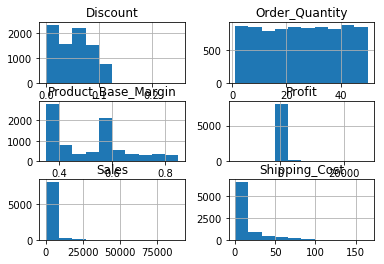

In [39]:
data.hist()

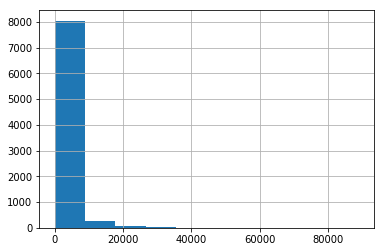

In [40]:
data['Sales'].hist()

In [41]:
data.corr()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Sales,1.000000,-0.019686,0.220582,0.581960,0.434578,0.155794
Discount,-0.019686,1.000000,-0.009649,-0.037128,-0.001956,0.004062
Order_Quantity,0.220582,-0.009649,1.000000,0.194655,-0.011457,0.007817
Profit,0.581960,-0.037128,0.194655,1.000000,-0.021362,-0.112124
Shipping_Cost,0.434578,-0.001956,-0.011457,-0.021362,1.000000,0.371056
Product_Base_Margin,0.155794,0.004062,0.007817,-0.112124,0.371056,1.000000


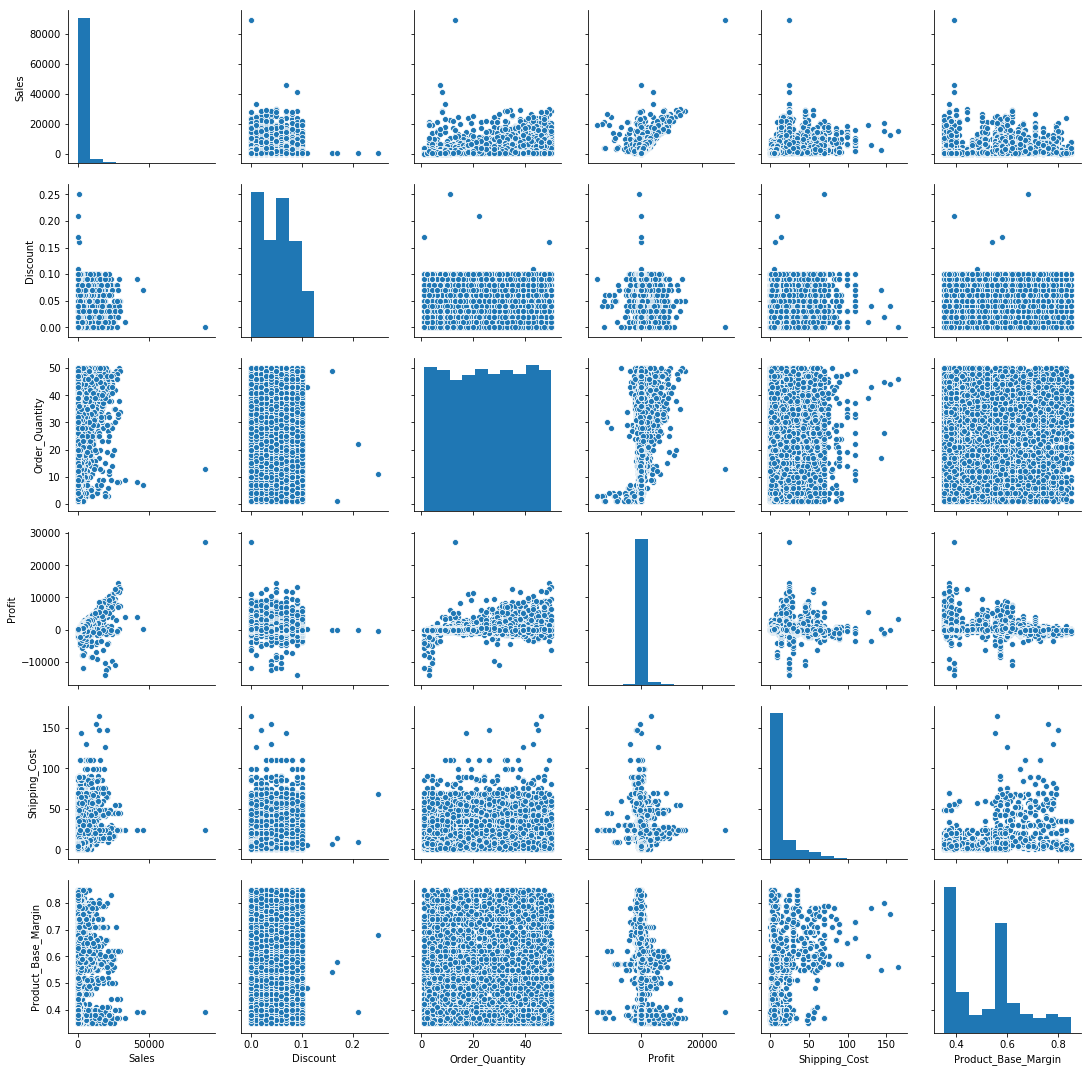

In [42]:
sns.pairplot(data)

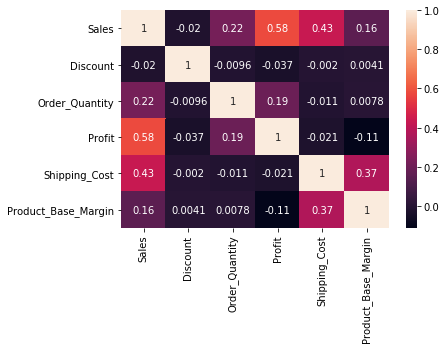

In [43]:
sns.heatmap(data.corr(),annot=True)

In [46]:
prod_df = pd.read_csv("prod_dimen.csv")
prod_df

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5
5,OFFICE SUPPLIES,PAPER,Prod_6
6,OFFICE SUPPLIES,RUBBER BANDS,Prod_7
7,TECHNOLOGY,COMPUTER PERIPHERALS,Prod_8
8,OFFICE SUPPLIES,ENVELOPES,Prod_9
9,FURNITURE,BOOKCASES,Prod_10


In [47]:
final_df = pd.merge(data,prod_df)
final_df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
5,Ord_4796,Prod_16,SHP_6686,Cust_1659,95.09,0.09,9,-13.53,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
6,Ord_1854,Prod_16,SHP_2548,Cust_727,182.47,0.05,17,-3.18,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
7,Ord_4506,Prod_16,SHP_6273,Cust_1544,92.02,0.07,9,-24.88,4.68,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
8,Ord_4080,Prod_16,SHP_5688,Cust_1388,666.40,0.00,39,2.02,7.42,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
9,Ord_1551,Prod_16,SHP_2145,Cust_531,184.77,0.00,29,-71.96,5.30,0.55,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


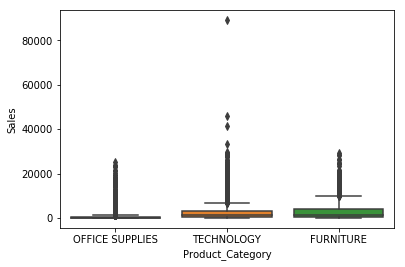

In [48]:
sns.boxplot(x='Product_Category',y="Sales",data=final_df)

In [49]:
cust_df = pd.read_csv("cust_dimen.csv")
cust_df

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5
5,MONICA FEDERLE,NUNAVUT,NUNAVUT,CORPORATE,Cust_6
6,DOROTHY BADDERS,NUNAVUT,NUNAVUT,HOME OFFICE,Cust_7
7,NEOLA SCHNEIDER,NUNAVUT,NUNAVUT,HOME OFFICE,Cust_8
8,CARLOS DALY,NUNAVUT,NUNAVUT,HOME OFFICE,Cust_9
9,CLAUDIA MINER,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_10


In [50]:
final_df = pd.merge(final_df,cust_df)
final_df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59,TECHNOLOGY,TELEPHONES AND COMMUNICATION,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
5,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38,TECHNOLOGY,OFFICE MACHINES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
6,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.0500,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE
7,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.8200,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",ADRIAN SHAMI,ALBERTA,WEST,CONSUMER
8,Ord_5430,Prod_4,SHP_7588,Cust_1820,337.2035,0.09,9,-120.93,4.99,0.56,TECHNOLOGY,TELEPHONES AND COMMUNICATION,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER
9,Ord_5462,Prod_4,SHP_7632,Cust_1820,175.8565,0.03,10,-93.26,1.25,0.83,TECHNOLOGY,TELEPHONES AND COMMUNICATION,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER


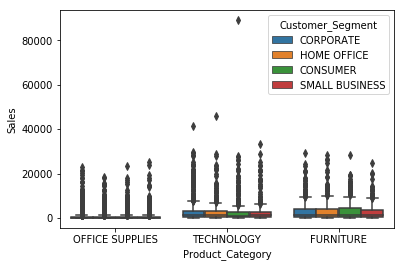

In [51]:
sns.boxplot(x='Product_Category',y="Sales",hue="Customer_Segment",data=final_df)

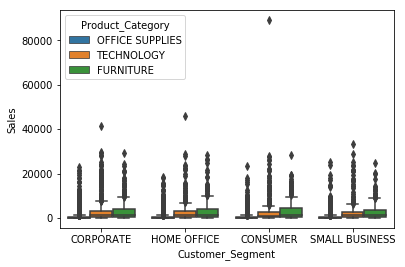

In [52]:
sns.boxplot(x='Customer_Segment',y="Sales",hue="Product_Category",data=final_df)


What is Impuattion?


What is Exploratory Data Analysis?


Possitively skewed,Negatively skewed


Uniform distribution


Distributions

- Normal distribution
- Gaussian Distribution
- Probability Density function
- Kernel density function
- Seaborn

- distplot
- rug
- hist
- barplot
- boxplot
- countplot
- pairplot
- jointplot
- heatmap


How to visualise a combo of categorical and numerical columns by using seaborn